In [31]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans

In [32]:
path = r"C:\Users\OMEN CI7\Documents\repository\Neurociencias-2025-2\S03_datasets\iris\iris.csv"

df = pd.read_csv(path)

<AxesSubplot:xlabel='Petal.Length', ylabel='Sepal.Length'>

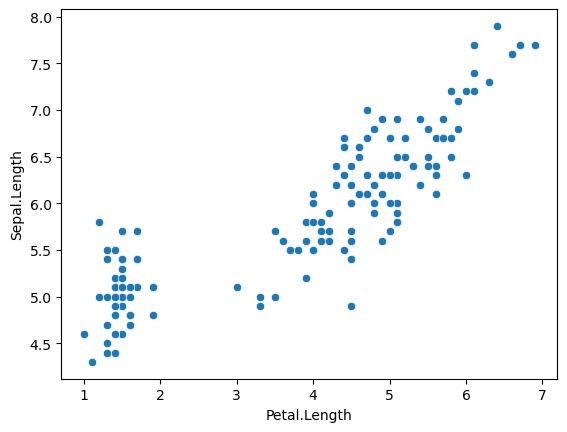

In [33]:
sns.scatterplot(data=df, x='Petal.Length', y = 'Sepal.Length')

In [34]:
# Normalizando datos
X_std = StandardScaler().fit_transform(df.iloc[:, :-1])

# Gaussian Mixture

In [35]:
gm = GaussianMixture(n_components=3, random_state=0).fit(X_std)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [36]:
df['modelo Gaussiano'] = gm.predict(X_std)

mapeo = {1: 'setosa', 2: 'virginica', 0: 'versicolor'}
df['modelo Gaussiano'] = df['modelo Gaussiano'] .map(mapeo)

# kmeans

In [37]:
kmeans = KMeans(n_clusters=3).fit(X_std)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [38]:
df['kmeans'] = kmeans.labels_

mapeo = {1: 'setosa', 0: 'versicolor', 2: 'virginica'}
df['kmeans'] = df['kmeans'].map(mapeo)

Text(792.3131313131312, 0.5, 'Real')

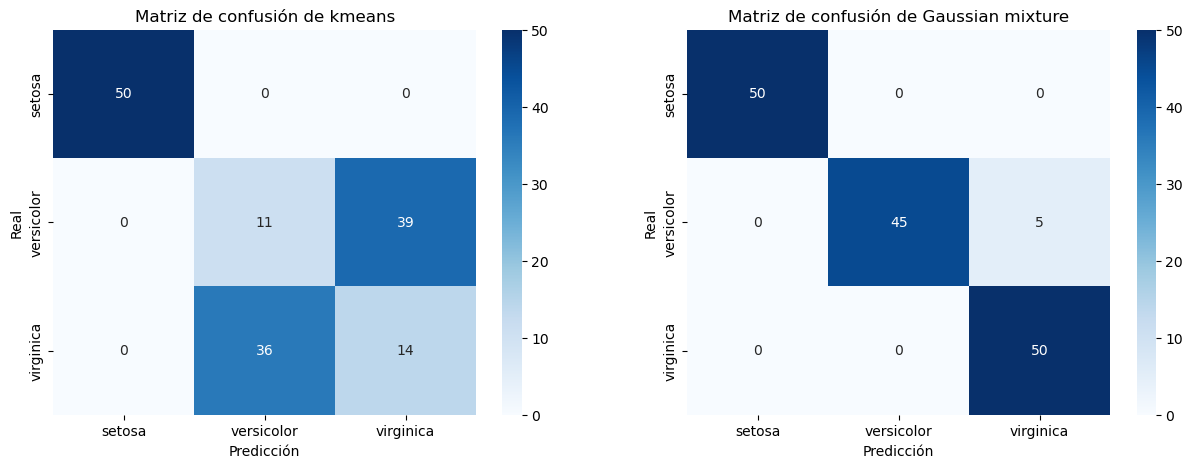

In [39]:
cm_gauss = confusion_matrix(df.Species, df['modelo Gaussiano'], labels=df.Species.unique())
cm_kmeans = confusion_matrix(df.Species, df.kmeans, labels=df.Species.unique())

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.heatmap(cm_kmeans, annot=True,
            xticklabels=df.Species.unique(), yticklabels=df.Species.unique(), 
           cmap="Blues", ax = axes[0]).set_title("Matriz de confusión de kmeans")

axes[0].set_xlabel('Predicción')
axes[0].set_ylabel("Real")

sns.heatmap(cm_gauss, annot=True,
            xticklabels=df.Species.unique(), yticklabels=df.Species.unique(), 
           cmap="Blues", ax = axes[1]).set_title("Matriz de confusión de Gaussian mixture")

axes[1].set_xlabel('Predicción')
axes[1].set_ylabel("Real")

Text(0.5, 1.0, 'Método de Gaussian mixture')

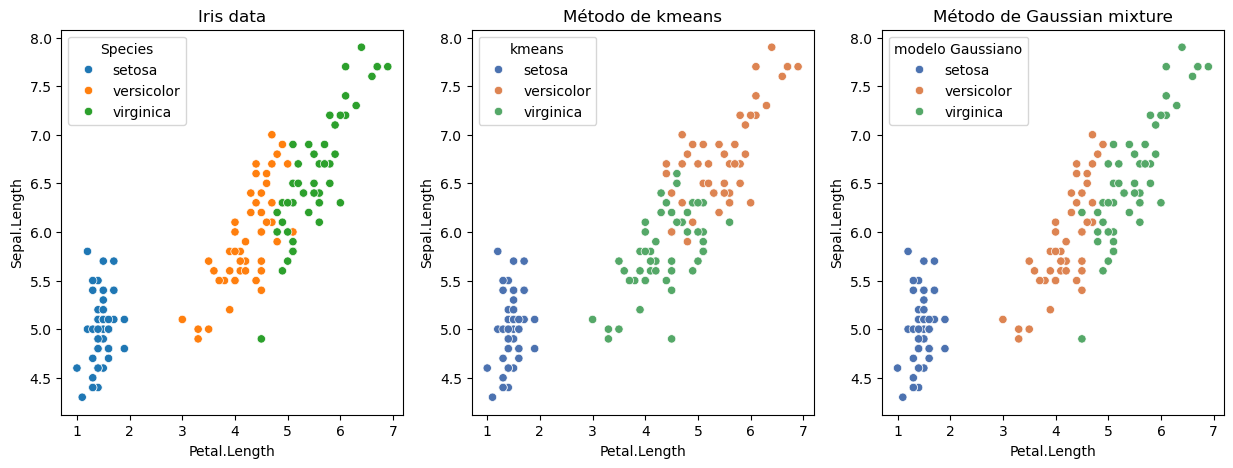

In [40]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.scatterplot(data=df, x='Petal.Length', y = 'Sepal.Length', 
                hue='Species', ax=axes[0]).set_title('Iris data')

sns.scatterplot(data=df, x='Petal.Length', y = 'Sepal.Length', 
                hue='kmeans', palette='deep', ax=axes[1]).set_title('Método de kmeans')

sns.scatterplot(data=df, x='Petal.Length', y = 'Sepal.Length', 
                hue='modelo Gaussiano', palette='deep', ax=axes[2]).set_title('Método de Gaussian mixture')

# Clustering jerárquico

In [41]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

[]

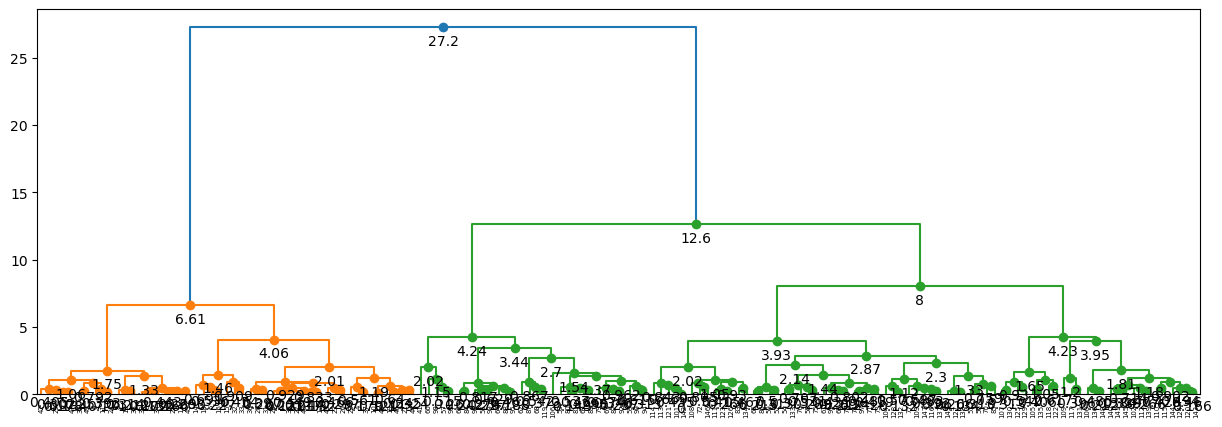

In [49]:
Z = linkage(X_std, 'ward')

plt.figure(figsize=(15, 5))
ddata = dendrogram(Z)
for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
    x = 0.5 * sum(i[1:3])
    y = d[1]
    plt.plot(x,y,'o',c=c)
    plt.annotate('%.3g'%y, (x,y), xytext=(0,-5), 
                 textcoords="offset points", va="top", ha="center")

plt.plot()

In [43]:
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 2, 3, 2, 3, 2, 3, 2, 2, 3, 2, 3, 2, 3,
       2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 2, 3, 3, 2,
       2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

In [44]:
clusters = fcluster(Z, t=10, criterion='distance')

df['cluster_jerarquico'] = clusters

mapeo = {1: 'setosa', 3: 'virginica', 2: 'versicolor'}
df['cluster_jerarquico'] = df['cluster_jerarquico'] .map(mapeo)

Text(0.5, 1.0, 'Cluster jerárquico')

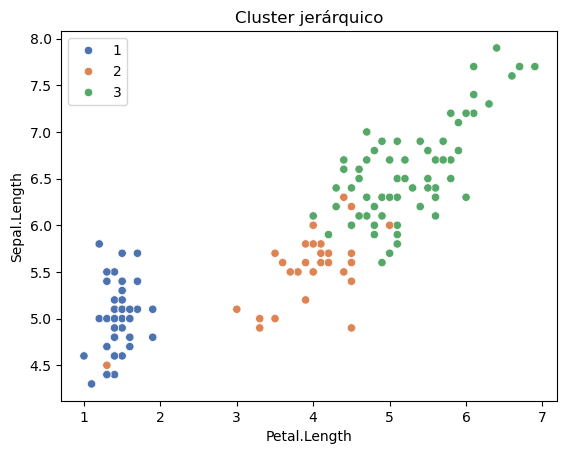

In [45]:
sns.scatterplot(data=df, x='Petal.Length', y = 'Sepal.Length', 
                hue=clusters, palette='deep').set_title('Cluster jerárquico')

# Coparación de métodos

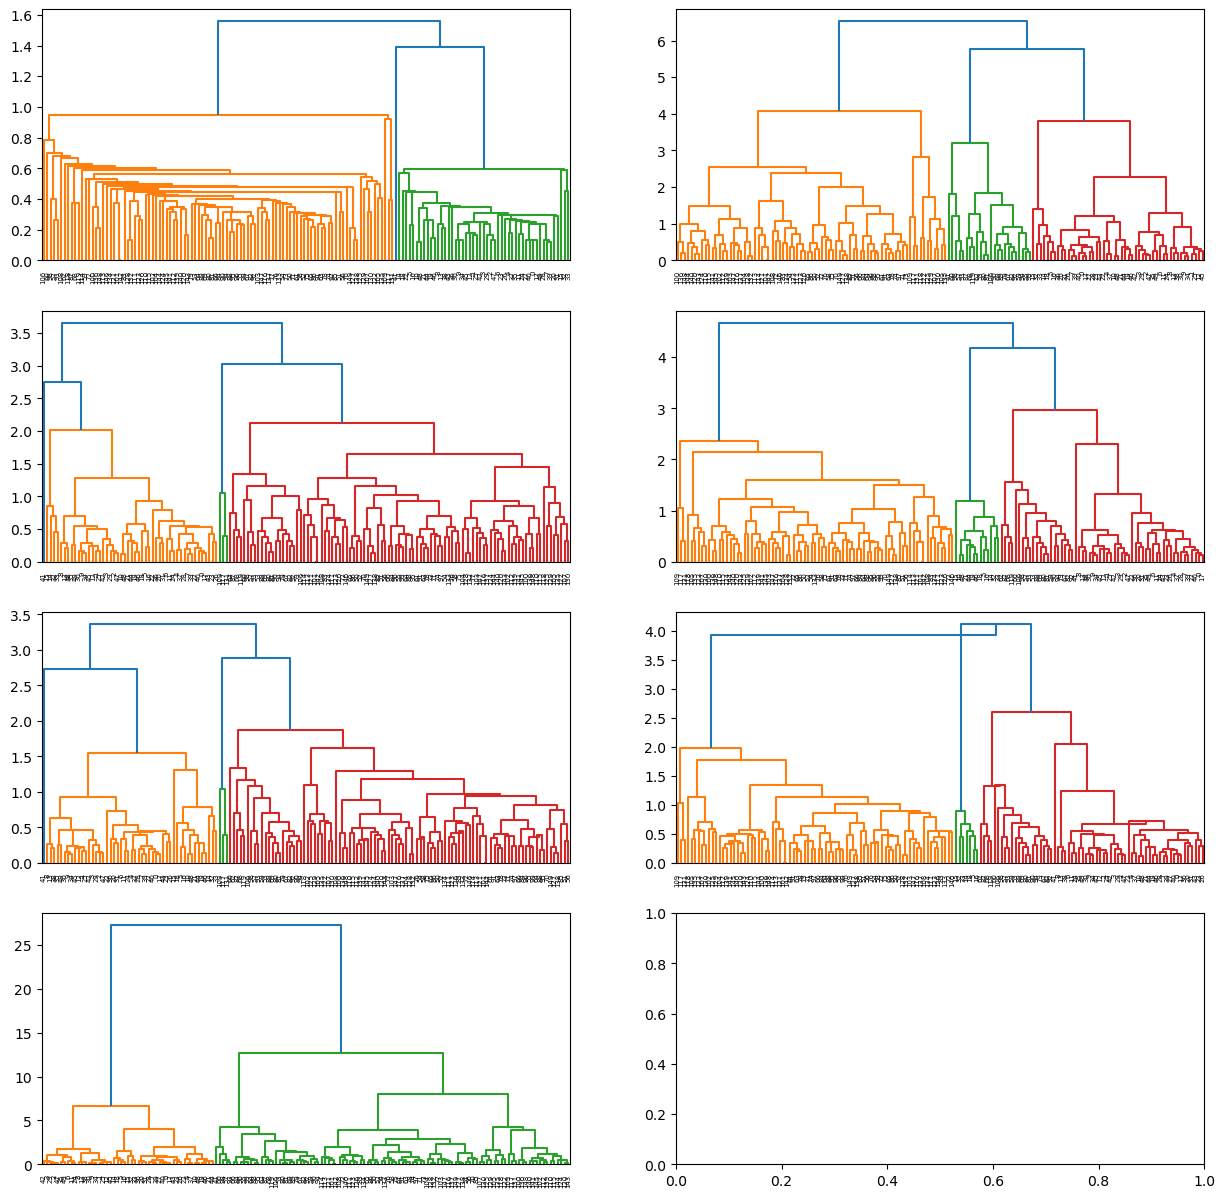

In [46]:
Z0 = linkage(X_std, 'single')
Z1 = linkage(X_std, 'complete')
Z2 = linkage(X_std, 'average')
Z3 = linkage(X_std, 'weighted')
Z4 = linkage(X_std, 'centroid')
Z5 = linkage(X_std, 'median')
Z6 = linkage(X_std, 'ward')

fig, axes = plt.subplots(4, 2, figsize=(15, 15))

dendrogram(Z0, ax=axes[0][0])
dendrogram(Z1, ax=axes[0][1])
dendrogram(Z2, ax=axes[1][0])
dendrogram(Z3, ax=axes[1][1])
dendrogram(Z4, ax=axes[2][0])
dendrogram(Z5, ax=axes[2][1])
dendrogram(Z6, ax=axes[3][0])

plt.show()

Text(0.5, 1.0, 'ward')

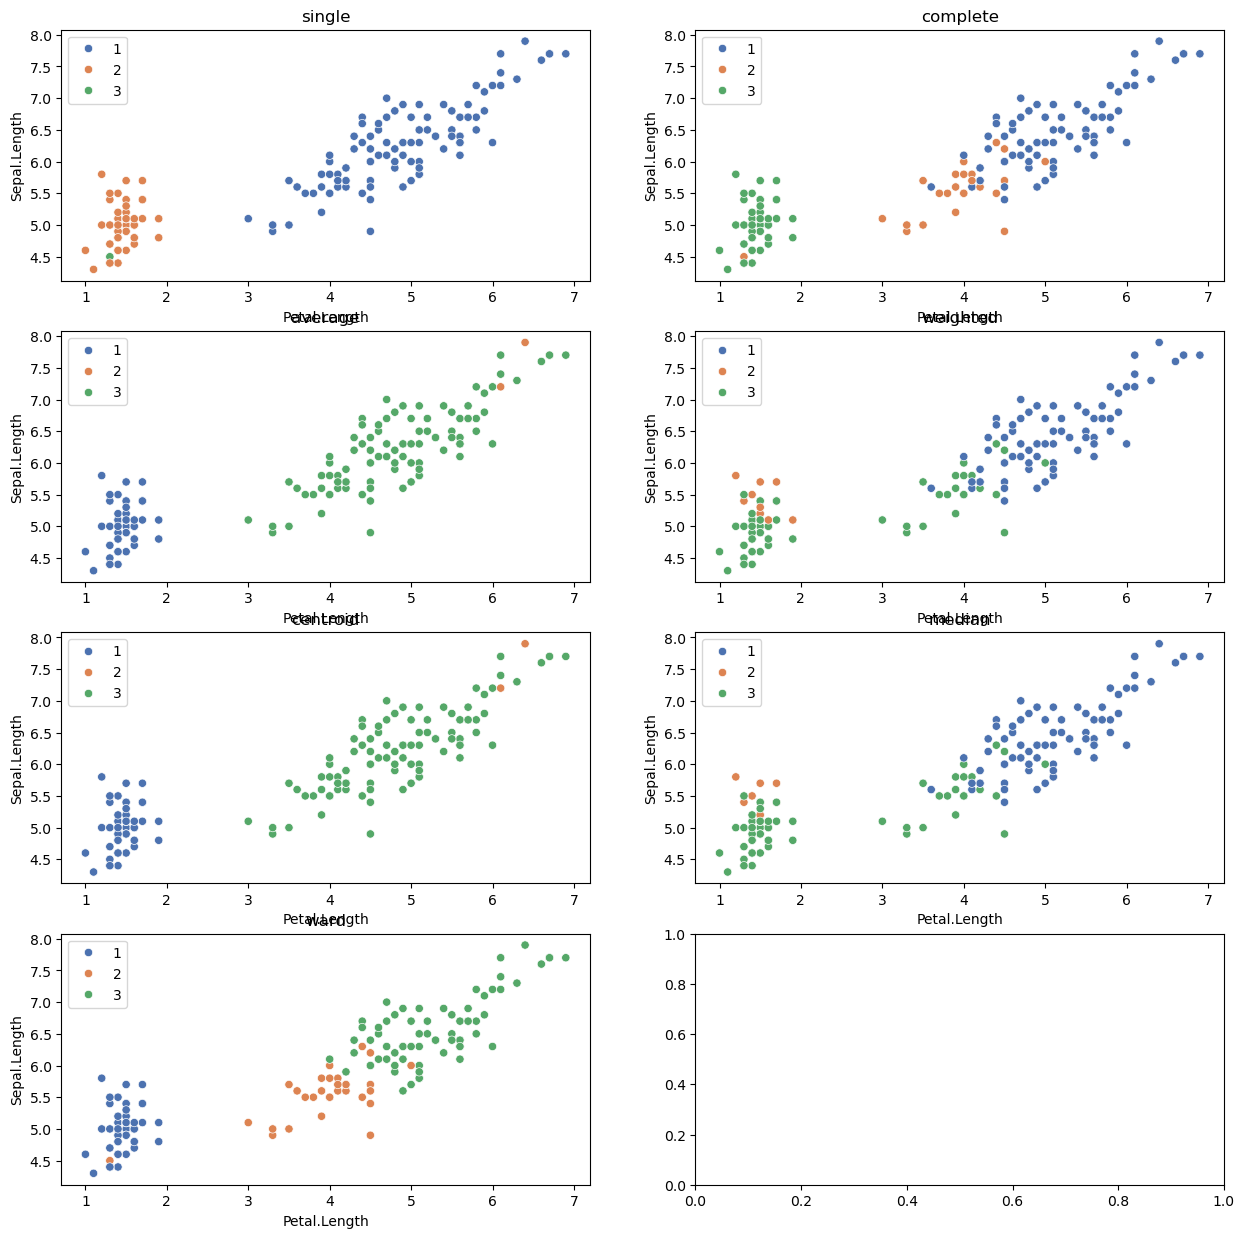

In [47]:
clusters0 = fcluster(Z0, t=1.0, criterion='distance')
clusters1 = fcluster(Z1, t=4.5, criterion='distance')
clusters2 = fcluster(Z2, t=2.8, criterion='distance')
clusters3 = fcluster(Z3, t=3.5, criterion='distance')
clusters4 = fcluster(Z4, t=2.8, criterion='distance')
clusters5 = fcluster(Z5, t=3.0, criterion='distance')
clusters6 = fcluster(Z6, t=10, criterion='distance')

fig, axes = plt.subplots(4, 2, figsize=(15, 15))

sns.scatterplot(data=df, x='Petal.Length', y = 'Sepal.Length', 
                hue=clusters0, palette='deep', ax=axes[0][0]).set_title('single')
sns.scatterplot(data=df, x='Petal.Length', y = 'Sepal.Length', 
                hue=clusters1, palette='deep', ax=axes[0][1]).set_title('complete')
sns.scatterplot(data=df, x='Petal.Length', y = 'Sepal.Length', 
                hue=clusters2, palette='deep', ax=axes[1][0]).set_title('average')
sns.scatterplot(data=df, x='Petal.Length', y = 'Sepal.Length', 
                hue=clusters3, palette='deep', ax=axes[1][1]).set_title('weighted')
sns.scatterplot(data=df, x='Petal.Length', y = 'Sepal.Length', 
                hue=clusters4, palette='deep', ax=axes[2][0]).set_title('centroid')
sns.scatterplot(data=df, x='Petal.Length', y = 'Sepal.Length', 
                hue=clusters5, palette='deep', ax=axes[2][1]).set_title('median')
sns.scatterplot(data=df, x='Petal.Length', y = 'Sepal.Length', 
                hue=clusters6, palette='deep', ax=axes[3][0]).set_title('ward')

# Coparación de modelos

Text(978.81045751634, 0.5, 'Real')

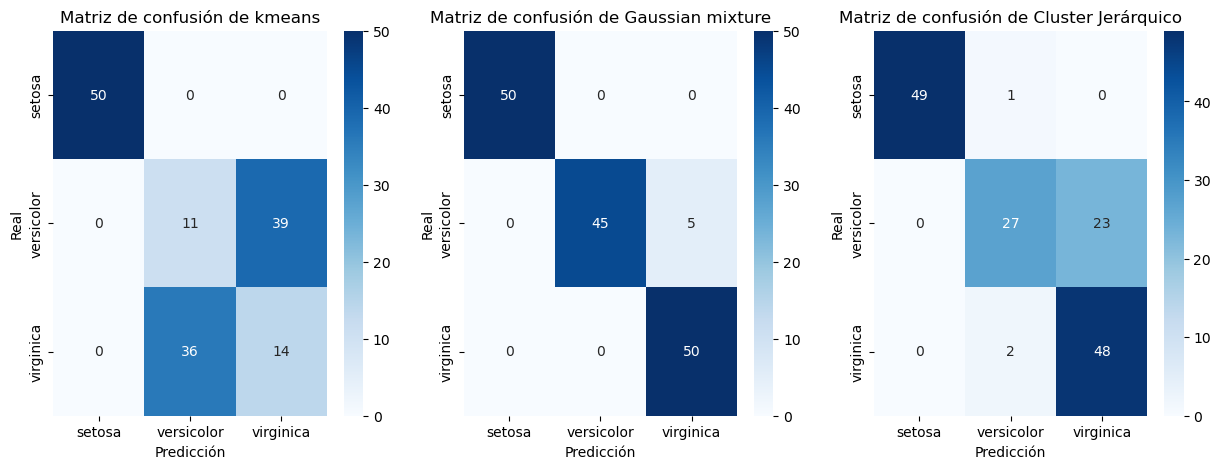

In [48]:
cm_jerarquic = confusion_matrix(df.Species, df.cluster_jerarquico, labels=df.Species.unique())

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.heatmap(cm_kmeans, annot=True,
            xticklabels=df.Species.unique(), yticklabels=df.Species.unique(), 
           cmap="Blues", ax = axes[0]).set_title("Matriz de confusión de kmeans")

axes[0].set_xlabel('Predicción')
axes[0].set_ylabel("Real")

sns.heatmap(cm_gauss, annot=True,
            xticklabels=df.Species.unique(), yticklabels=df.Species.unique(), 
           cmap="Blues", ax = axes[1]).set_title("Matriz de confusión de Gaussian mixture")

axes[1].set_xlabel('Predicción')
axes[1].set_ylabel("Real")

sns.heatmap(cm_jerarquic, annot=True,
            xticklabels=df.Species.unique(), yticklabels=df.Species.unique(), 
           cmap="Blues", ax = axes[2]).set_title("Matriz de confusión de Cluster Jerárquico")

axes[2].set_xlabel('Predicción')
axes[2].set_ylabel("Real")